# Teste A/B Propaganda

Dataset contendo um teste A/B feio por uma agência de propaganda.

Fonte: https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing

Neste projeto serão feitas análises com Teste A/B sobre o rendimento de uma alteração em um anúncio interativo fictício, com uma pergunta e dois botões: Sim e Não.

#### Dicionário

**auction_id:** identificação do usuário que teve contato com o teste. Os usuários que optarem por não responder terão a colunas 'yes' e 'no' com valor 0.

**experiment:** grupo do usuário, controle ou experimental
  * control: usuários que viram um anúncio fictício.
  * exposed: usuários que viram o anúncio a ser experimentado. Um anúncio interativo, com a marca SmartAd.

**date:** data em que o usuário teve contato com o experimento (no formato YYYY-MM-DD).

**hour:** hora do dia (no formato HH)

**device_make:** nome do tipo de aparelho do usuário.

**platform_os:** id do sistema operacional do usuário.

**browser:** nome do navegador que o usuário utilizou para ver o questionário.

**yes:** 1 se o usuário pressionou o botão YES do questionário.

**no:** 1 se o usuário pressionou o botão NO do questionário.

### Imports

In [1]:
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Abertura do dataset

In [3]:
# Tutorial: https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/

!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tassianaoliveira
Your Kaggle Key: ··········


100%|██████████| 216k/216k [00:00<00:00, 58.2MB/s]

In [4]:
data = pd.read_csv('/content/ad-ab-testing/AdSmartABdata - AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# Tratamentos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


* Não há dados nulos.
* A data pode ser convertida para datetime.

In [6]:
data.iloc[: ,0].nunique() == data.shape[0]

True

* Não há linhas duplicadas no dataset.

In [7]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 568.0+ KB


# Resumo de números do teste

## Verificação da proporção de cada grupo

In [8]:
experiment_count = data.groupby('experiment').count().reset_index()[['experiment', 'auction_id']]
experiment_count.rename(columns = {'auction_id':'n_users'}, inplace = True)

total_usuarios = experiment_count['n_users'].sum()
print(f'O total de usuários que viram os anúncios foi de {total_usuarios}.')

experiment_count['%_do_total'] = (experiment_count['n_users'] / total_usuarios * 100).round(2)

experiment_count

O total de usuários que viram os anúncios foi de 8077.


,experiment,n_users,%_do_total
0,control,4071,50.4
1,exposed,4006,49.6


* A proporção de usuários exposta em cada grupo do experimento foi próxima à 50%.

## Botões pressionados em cada grupo

In [9]:
data['button'] = ['None' for x in data['auction_id']]
data.loc[data['yes'] == 1, 'button'] = 'Yes'
data.loc[data['no'] == 1, 'button'] = 'No'
#data.tail(15)

In [10]:
experiment_button = data.groupby(['experiment', 'button']).count()
experiment_button = experiment_button.reset_index()[['experiment', 'button', 'auction_id']]
experiment_button.rename(columns = {'auction_id': 'n_users'}, inplace = True)
experiment_button

,experiment,button,n_users
0,control,No,322
1,control,None,3485
2,control,Yes,264
3,exposed,No,349
4,exposed,None,3349
5,exposed,Yes,308


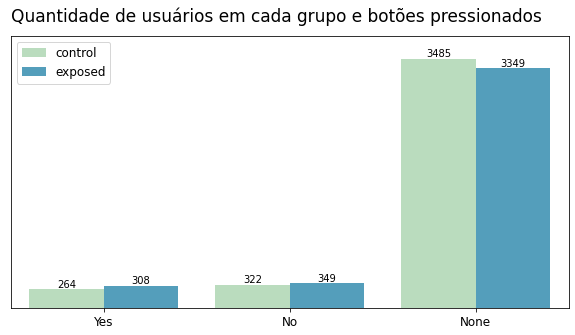

In [11]:
plt.figure(figsize = (10,5))

ax = sns.barplot(data = experiment_button, x = 'button', y = 'n_users', hue = 'experiment', palette = 'GnBu', order = ['Yes', 'No', 'None'])

ax.set_title('Quantidade de usuários em cada grupo e botões pressionados', fontsize = 17, pad = 15, horizontalalignment = 'left', x = 0)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks(fontsize = 12)
plt.yticks([])

plt.legend(title='', fontsize = 12)

ax.set_ylim((0, 3800))

plt.show()

* Em números totais, o grupo exposto ao novo anúncio interagiu mais do que os usuários do grupo de controle.

* Entretanto, a diferença é pequena e pode não ser estatisticamente relevante.

# Botões pressionados por navegador

In [12]:
browser_none = data.query('button == "None"').groupby('browser').count().reset_index()[['browser', 'button']].rename(columns = {'button':'None_button'})
browser_yes = data.query('button == "Yes"').groupby('browser').count().reset_index()[['browser', 'button']].rename(columns = {'button':'Yes_button'})
browser_no = data.query('button == "No"').groupby('browser').count().reset_index()[['browser', 'button']].rename(columns = {'button':'No_button'})

browser_button = browser_none.merge(right = browser_yes, on = 'browser', how = 'left').merge(right = browser_no, on = 'browser', how = 'left').fillna(0)
#browser_button

In [13]:
browser_button['total_clicks'] = browser_button['None_button'] + browser_button['No_button'] + browser_button['Yes_button']
browser_button['%None_button'] = ((browser_button['None_button'] / browser_button['total_clicks']) * 100).round(2)
browser_button['%No_button'] = ((browser_button['No_button'] / browser_button['total_clicks']) * 100).round(2)
browser_button['%Yes_button'] = ((browser_button['Yes_button'] / browser_button['total_clicks']) * 100).round(2)

#browser_button

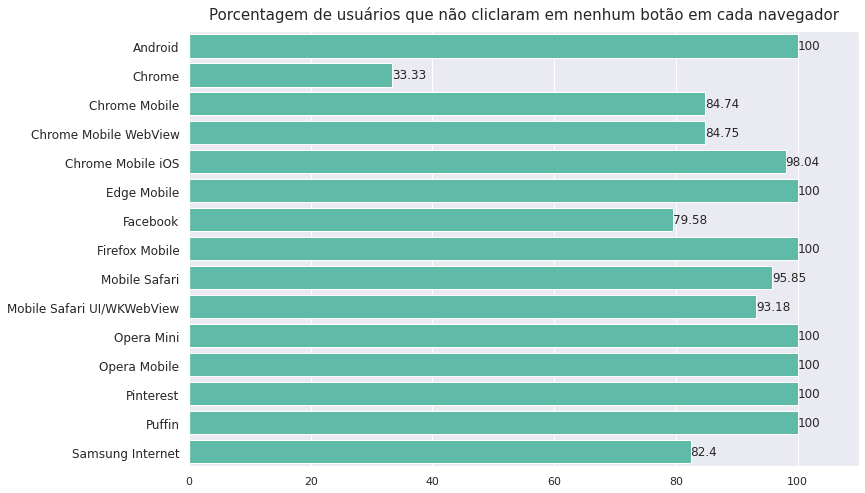

In [14]:
sns.set_theme(style="darkgrid")
paleta = ['#50c9b1' for i in range(len(browser_button['browser'].unique()))]

plt.figure(figsize = (12,8))
ax = sns.barplot(data = browser_button, y = 'browser', x = '%None_button', palette = paleta)

ax.set_title('Porcentagem de usuários que não cliclaram em nenhum botão em cada navegador', fontsize = 15, pad = 12)
ax.set_ylabel('')
ax.set_xlabel('')
plt.yticks(fontsize = 12)
    
ax.bar_label(ax.containers[0])
ax.set_xlim((0, 110))

plt.show()

* É possível que os usuários tenham tido problemas em visualizar os anúncios nos navegadores em que o percentual foi 100%, mas como foram pouquíssimos acessos, não temos como chegar a uma conclusão.

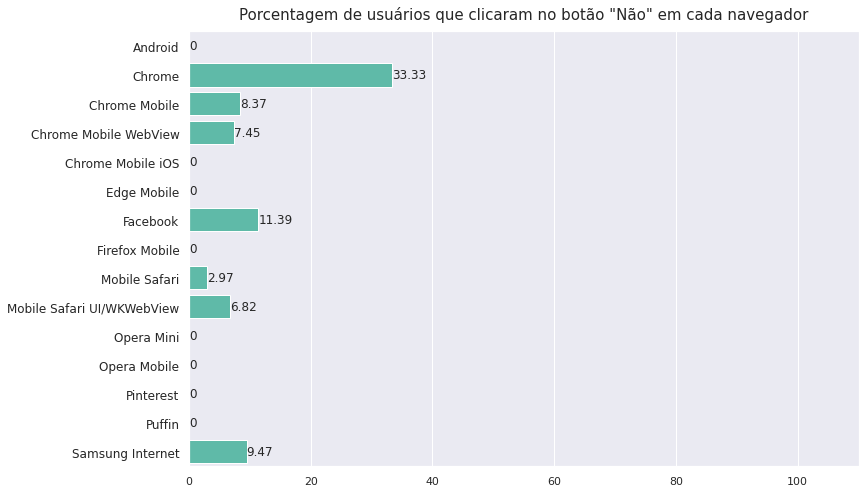

In [15]:
sns.set_theme(style="darkgrid")
paleta = ['#50c9b1' for i in range(len(browser_button['browser'].unique()))]

plt.figure(figsize = (12,8))
ax = sns.barplot(data = browser_button, y = 'browser', x = '%No_button', palette = paleta)

ax.set_title('Porcentagem de usuários que clicaram no botão "Não" em cada navegador', fontsize = 15, pad = 12)
ax.set_ylabel('')
ax.set_xlabel('')
plt.yticks(fontsize = 12)
    
ax.bar_label(ax.containers[0])
ax.set_xlim((0, 110))

plt.show()

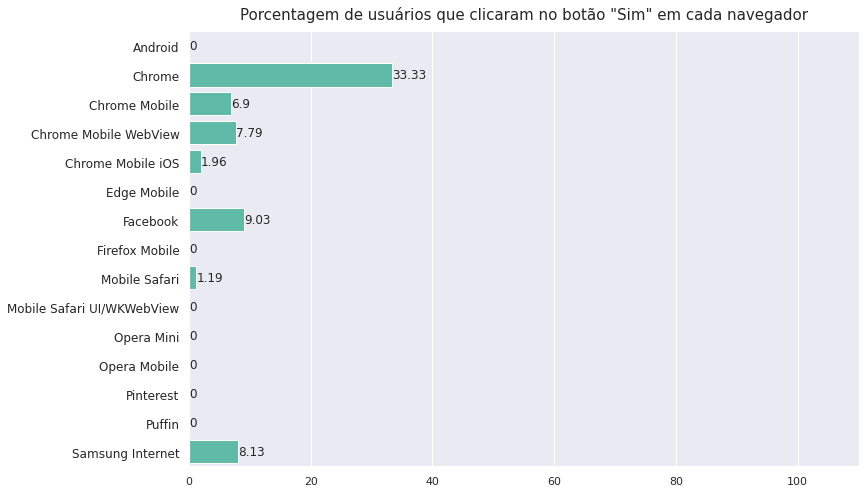

In [16]:
sns.set_theme(style="darkgrid")
paleta = ['#50c9b1' for i in range(len(browser_button['browser'].unique()))]

plt.figure(figsize = (12,8))
ax = sns.barplot(data = browser_button, y = 'browser', x = '%Yes_button', palette = paleta)

ax.set_title('Porcentagem de usuários que clicaram no botão "Sim" em cada navegador', fontsize = 15, pad = 12)
ax.set_ylabel('')
ax.set_xlabel('')
plt.yticks(fontsize = 12)
    
ax.bar_label(ax.containers[0])
ax.set_xlim((0, 110))

plt.show()

* Os navegadores Chrome, Edge Mobile, Firefox Mobile, Opera Mobile e Pinteres tiveram menos que cinco visualizações da propaganda. Estes serão removidos.

# Análise por grupo

In [17]:
interactions = data.query('(yes == 1) or (no == 1)')

control = interactions.query('experiment == "control"')
exposed = interactions.query('experiment == "exposed"')

n_interactions_control = control.shape[0]
n_interactions_exposed = exposed.shape[0]
n_interactions = interactions.shape[0]

print(f'Dos {n_interactions} usuários que interagiram com os anúncios, {n_interactions_control} viram o anúncio antigo.')
print(f'Dos {n_interactions} usuários que interagiram com os anúncios, {n_interactions_exposed} viram o anúncio novo.')

Dos 1243 usuários que interagiram com os anúncios, 586 viram o anúncio antigo.
Dos 1243 usuários que interagiram com os anúncios, 657 viram o anúncio novo.


In [18]:
control_percentuals = control.groupby('button').count().reset_index()[['button', 'auction_id']]
control_percentuals['%'] = (control_percentuals['auction_id'] / control.shape[0] * 100).round(2)
control_percentuals.rename(columns = {'auction_id':'n_users'}, inplace = True)
control_percentuals

,button,n_users,%
0,No,322,54.95
1,Yes,264,45.05


* A quantidade de usuários que escolheram "Yes" no anúncio antigo foi de 264.

In [19]:
exposed_percentuals = exposed.groupby('button').count().reset_index()[['button', 'auction_id']]
exposed_percentuals['%'] = (exposed_percentuals['auction_id'] / exposed.shape[0] * 100).round(2)
exposed_percentuals.rename(columns = {'auction_id':'n_users'}, inplace = True)
exposed_percentuals

,button,n_users,%
0,No,349,53.12
1,Yes,308,46.88


* A quantidade de usuários que escolheram "Yes" no anúncio novo foi de 308.

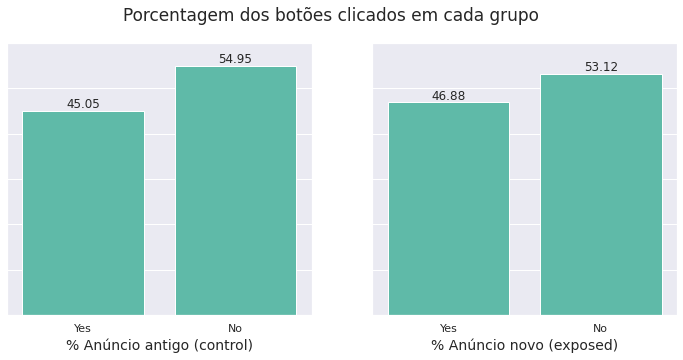

In [20]:
sns.set_theme(style="darkgrid")
palette = ['#50c9b1' for i in range(2)]

fig, axs = plt.subplots(1, 2, sharey=True, figsize = (12,5))
fig.suptitle('Porcentagem dos botões clicados em cada grupo', 
             fontsize = 17)

ax0 = sns.barplot(ax = axs[0], data = control_percentuals, x = 'button', y = '%',
                  palette = palette, order = ['Yes', 'No'])
ax0.bar_label(ax0.containers[0])
ax0.set_xlabel('% Anúncio antigo (control)', fontsize = 14)
ax0.set_ylabel('')
ax0.set(yticklabels = [])

ax1 = sns.barplot(ax = axs[1], data = exposed_percentuals, x = 'button', y = '%',
                  palette = palette, order = ['Yes', 'No'])
ax1.bar_label(ax1.containers[0])
ax1.set_xlabel('% Anúncio novo (exposed)', fontsize = 14)
ax1.set_ylabel('')
ax1.set(yticklabels = [])

ax1.set_ylim((0, 60))

plt.show()

* A diferença de porcentagens de usuários que clicaram em "Yes" nos dois anúncios foi de, aproximadamente, 1,83%.

* O teste a seguir irá avaliar se essa diferença é estatisticamente relevante ou não.

# Formulação de hipóteses

A Hipótese Nula afirma que as quantidades de pessoas que escolheram "Yes" nos dois anúncios foram estatisticamente iguais, enquanto a Hipótese Alternativa afirma o contrário.

> $H_0: Y_n - Y_a = 0$

> $H_1: Y_n - Y_a \ne 0$ 

* O nível de significância do Teste A/B será de 5%, e o teste será bi-caudal. 

* Como, em números exatos, a quantidade de pessoas que escolheram "Yes" no anúncio novo é maior do que no anúncio antigo, a rejeição de $H_0$ e aceitação de $H_1$ também afirma a superioridade ($Yn > Ya$).

# Teste Qui-Quadrado ($\chi^2$)

In [46]:
table = control_percentuals[['button', 'n_users']].copy()
table.rename(columns = {'n_users':'control'}, inplace = True)
table['exposed'] = exposed_percentuals['n_users']

table.loc[table['button'] == 'No', 'button'] = 0
table.loc[table['button'] == 'Yes', 'button'] = 1

table.set_index('button', inplace = True)

table

,control,exposed
button,,
0,322,349
1,264,308


In [40]:
from scipy.stats import chi2_contingency

In [51]:
chi_2, p_value, df, _ = chi2_contingency(table)
print(f'X² = {chi_2}')
print(f'p-value = {p_value}')
print(f'degrees of freedom = {df}')

X² = 0.3465426444731173
p-value = 0.5560768104229136
degrees of freedom = 1


## Teste com p-valor

In [50]:
alpha = 0.05

if p_value <= alpha:
  print('Rejeitar Hipótese Nula.')
else:
  print('Aceitar Hipótese Nula.')

Aceitar Hipótese Nula.


## Teste com valor crítico

In [52]:
from scipy.stats import chi

In [54]:
chi_2_alpha = chi.ppf(1 - alpha, df) ** 2
chi_2_alpha

3.8414588206941245

In [55]:
if chi_2 > chi_2_alpha:
  print('Rejeitar Hipótese Nula.')
else:
  print('Aceitar Hipótese Nula.')

Aceitar Hipótese Nula.
